In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import pandas as pd
from nltk.corpus import stopwords
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import warnings
import nltk


df_train = pd.read_csv("C:/Users/heave/Project/question1_sentiment.csv" , dtype={'review':str})
df_train.head()
#print(data.info())
#DataFrame(data.head())
#data.head()
#print(data.describe())
#print(data)

#data["review"].head()

#data = data.rename(columns = {'id':'a' , 'label':'b' , 'review':'c'}) #列名重命名



,id,label,review
0,1,1,With all this stuff going down at the moment w...
1,2,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,3,0,The film starts with a manager (Nicholas Bell)...
3,4,0,It must be assumed that those who praised this...
4,5,1,Superbly trashy and wondrously unpretentious 8...


In [2]:
df_test = pd.read_csv("C:/Users/heave/Project/question1_sentiment.csv")
df_test.head()

,id,label,review
0,1,1,With all this stuff going down at the moment w...
1,2,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,3,0,The film starts with a manager (Nicholas Bell)...
3,4,0,It must be assumed that those who praised this...
4,5,1,Superbly trashy and wondrously unpretentious 8...


In [3]:

#data["review"].head()
#data.to_csv('cleanfile.csv' encoding='utf-8') #数据保存

df_train.review = df_train.review.str.lower()
df_train.review = df_train.review.str.strip()
#data.dropna() #删除包含NA的不完整的行
#data.dropna(subset=['review'])
#data.review.head()

In [6]:
from bs4 import BeautifulSoup
nltk.download("stopwords")

def review_to_words( raw_review ):
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review, 'lxml').get_text() 
    
    # 2. Remove non-letters with regex
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                           
    
    # 4. Create set of stopwords
    stops = set(stopwords.words("english"))                  
    
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

df_train["review"]=df_train["review"].apply(review_to_words)
#df_test.dropna()
df_train.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heave\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,id,label,review
0,1,1,stuff going moment mj started listening music ...
1,2,1,classic war worlds timothy hines entertaining ...
2,3,0,film starts manager nicholas bell giving welco...
3,4,0,must assumed praised film greatest filmed oper...
4,5,1,superbly trashy wondrously unpretentious explo...


In [7]:
df_test['review']=df_test['review'].apply(review_to_words)

#data.dropna() #删除包含NA的不完整的行
df_test.head()

,id,label,review
0,1,1,stuff going moment mj started listening music ...
1,2,1,classic war worlds timothy hines entertaining ...
2,3,0,film starts manager nicholas bell giving welco...
3,4,0,must assumed praised film greatest filmed oper...
4,5,1,superbly trashy wondrously unpretentious explo...


In [8]:
df_train.isnull().sum(),df_test.isnull().sum()


(id        0
 label     0
 review    0
 dtype: int64, id        0
 label     0
 review    0
 dtype: int64)

In [9]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df_train["review"])

ModuleNotFoundError: No module named 'wordcloud'

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

Using TensorFlow backend.


In [11]:
list_classes = ["label"]
y = df_train[list_classes].values
list_sentences_train = df_train["review"]
list_sentences_test = df_test["review"]

In [12]:
max_features = 6000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

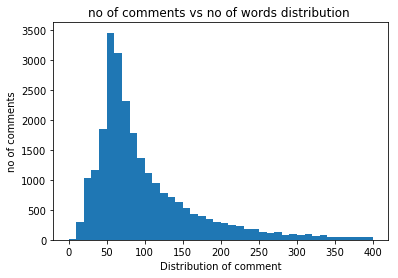

In [13]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]
plt.hist(totalNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.xlabel("Distribution of comment")
plt.ylabel("no of comments")
plt.title("no of comments vs no of words distribution ")
plt.show()

In [14]:
maxlen = 370
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [15]:
inp = Input(shape=(maxlen, ))
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

In [16]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [17]:
batch_size = 32
epochs = 2
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 195s 10ms/step - loss: 0.3844 - acc: 0.8190 - val_loss: 1.9718 - val_acc: 0.0000e+00
Epoch 2/2
20000/20000 [==============================] - 204s 10ms/step - loss: 0.2302 - acc: 0.9111 - val_loss: 1.0399 - val_acc: 0.0000e+00


In [18]:
prediction = model.predict(X_te)
y_pred = (prediction > 0.5)

In [25]:
#df_test["label"] = df_test["id"].map(lambda x: 1 if int(x.strip('"').split("_")[1]) >= 5 else 0)
y_test = df_test["label"]

#print(y_test)


In [22]:
from sklearn.metrics import f1_score, confusion_matrix
print('F1-score: {0}'.format(f1_score(y_pred, y_test)))
print('Confusion matrix:')
confusion_matrix(y_pred, y_test)

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [ ]:
# ouput submission file 
df_test = df_test[['id','label']]

In [ ]:
df_test.to_csv("C:/Users/heave/Project/question1_submission.csv",index=False)